<a href="https://colab.research.google.com/github/SimonHegelich/Datenanalyse/blob/main/Notebook_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programmierübung: <font color='darkorange'> Model Selection </font>

##### <font color='darkorange'> Datenanalyse, Sommersemester 2022, Professur für Political Data Science </font>

In diesem Notebook benutzen wir die tidyverse Programmierung, die uns ein etwas moderners R-Feeling ermöglicht.

In [7]:
# Packages
install.packages(c("tidyverse", "leaps", "ISLR"))
library(tidyverse)  # data manipulation and visualization
library(leaps)      # model selection functions

# Load data and remove rows with missing data
(
  hitters <- na.omit(ISLR::Hitters) %>%
    as_tibble
  )

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N
401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.000,A


## Best Subset Selection
Die Idee ist, dass wir aus allen möglichen Modellen einfach das beste auswählen. Also müssen wir alle Modelle fitten, die genau eine unabhängige Variable enthalten, alle Kombinationen mit zwei Variablen usw.

Dafür gehen wir in drei Schritten vor:
1. M0 wird gefittet: Ein Modell ohne unabhängige Variablen (Intercept-only, also der Mittelwert von Y)
2. For k = 1, 2, ... p:
Fitte alle Modelle, die genau k unabhängige Variablen haben und wähle das beste aus und nenne es Mk. "Das beste" ist hier das Modell mit dem kleinsten RSS (oder, was das gleiche ist: höchstem R²)
3. Suche das insgesamt beste Modell aus. Dafür muss man ein Maß wählen (Crossvaliation-Error, Manows C, AIC, BIC oder adjusted R²)


Dieser Algorithmus ist in der leaps-Library bereits implementiert und kann mit dem Befehl "regsubset" aufgerufen werden.

In [8]:
best_subset <- regsubsets(Salary ~ ., hitters, nvmax = 19)
summary(best_subset)

Subset selection object
Call: regsubsets.formula(Salary ~ ., hitters, nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 )  " "   "*"  " "  

Wir haben angegeben, dass wir bis zu 19 Variablen überprüfen wollen. Die Liste zeigt nun für jede Anzahl von Variablen von 1-19 welche Variablen im besten Modell sind.

## Stepwise
Auch Stepwise-Regression kann mit regsubset ausgeführt werden:

In [9]:
forward <- regsubsets(Salary ~ ., hitters, nvmax = 19, method = "forward")

In [10]:
backward <- regsubsets(Salary ~ ., hitters, nvmax = 19, method = "backward")

## Modelselection
Aber welches ist nund das beste Modell? Dafür unterteilen wir die Daten in einen Trainings- und Testdatensatz und schauen uns den Test-RSS des Validation-Set-Approaches an.

Zunächst berechnen wir aber R², BIC und C_p auf den Trainingsdaten.

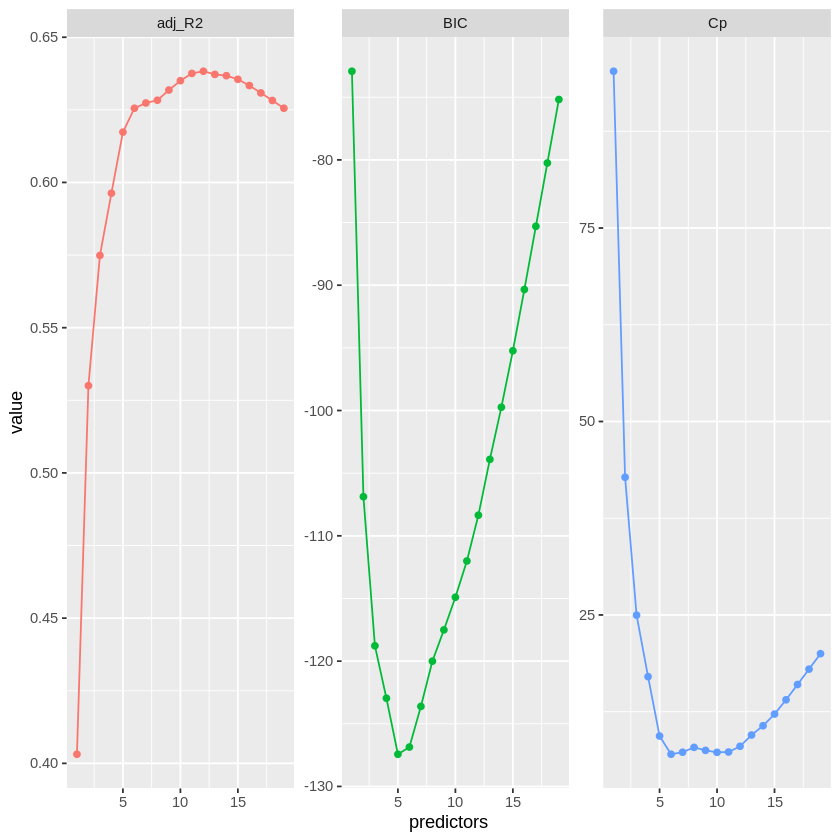

In [23]:
# create training - testing data
set.seed(123)
sample <- sample(c(TRUE, FALSE), nrow(hitters), replace = T, prob = c(0.6,0.4))
train <- hitters[sample, ]
test <- hitters[!sample, ]

# perform best subset selection
best_subset <- regsubsets(Salary ~ ., train, nvmax = 19)
results <- summary(best_subset)

# extract and plot results
tibble(predictors = 1:19,
       adj_R2 = results$adjr2,
       Cp = results$cp,
       BIC = results$bic) %>%
  gather(statistic, value, -predictors) %>%
  ggplot(aes(predictors, value, color = statistic)) +
  geom_line(show.legend = F) +
  geom_point(show.legend = F) +
  facet_wrap(~ statistic, scales = "free")

Der adjusted R² empfiehlt ein Modell mit 12 Variablen:

In [14]:
which.max(results$adjr2)

[1] 12

### Aufgabe:
Welche Modelle werden von BIC und C_p empfohlen?

Wir sehen also, dass die Maße unterschiedliche Modelle empfehlen. Aber es kommt noch schlimmer: Bislang haben wir nur auf die best model selection geschaut.
### Aufgabe:
Wiederhole die obige Programmierung für forward und backward selection!

Mit dem Befehl coef können wir sehen, welche Variablen in den jeweiligen Modellen ausgewählt wurden.

In [18]:
print("Best Subset")
coef(best_subset, 8) # model with 8 variables
print("Forward")
coef(forward, 8)
print("Backward")
coef(backward, 8)

[1] "Best Subset"


(Intercept)        Hits       Walks      CAtBat       CHits      CHmRun 
  9.7646318   1.1978861   1.6497354  -0.5642386   2.2224534   1.6798926 
  DivisionW     PutOuts      Errors 
-93.1413114   0.3629734   5.3410752

[1] "Forwar"


(Intercept)        AtBat         Hits        Walks        CRuns         CRBI 
 117.1520434   -2.0339209    6.8549136    6.4406642    0.7045391    0.5273238 
      CWalks    DivisionW      PutOuts 
  -0.8066062 -123.7798366    0.2753892

[1] "Backward"


(Intercept)        AtBat         Hits        Walks        CRuns         CRBI 
 117.1520434   -2.0339209    6.8549136    6.4406642    0.7045391    0.5273238 
      CWalks    DivisionW      PutOuts 
  -0.8066062 -123.7798366    0.2753892

Um jetzt unsere Best-Subset-Selection auf dem Testdatensatz zu überprüfen, basteln wir zunächst eine Model-Matrix, in der alle möglichen Modelle mit den Koeffizienten hinterlegt sind.

Dann können wir über die 19 Variablen loopen und die Test-Fehler berechnen.

In [19]:
test_m <- model.matrix(Salary ~ ., data = test)

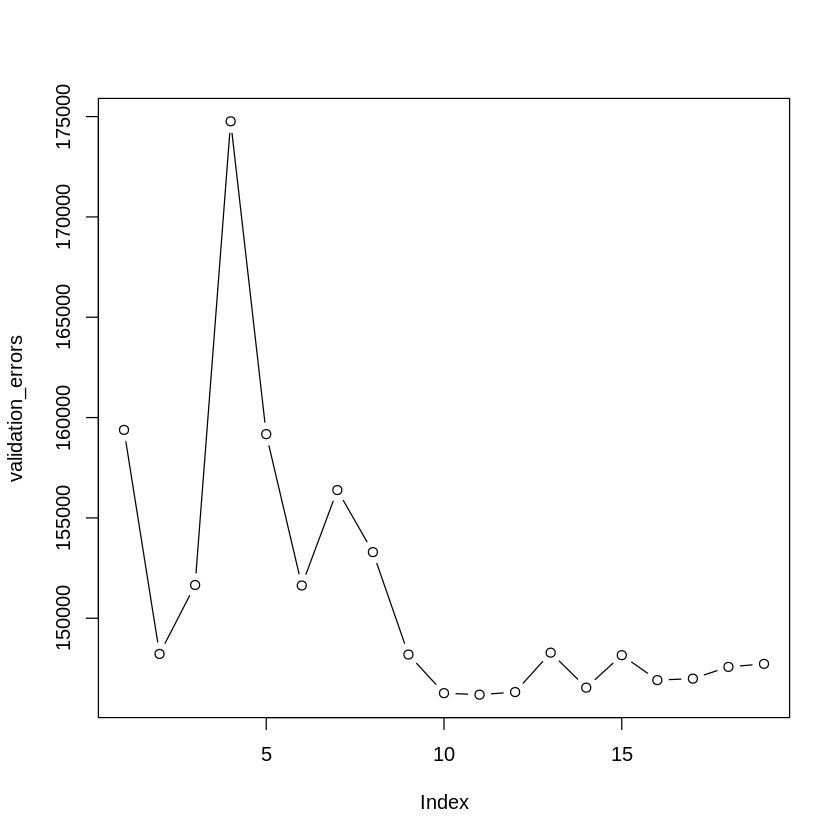

In [21]:
# create empty vector to fill with error values
validation_errors <- vector("double", length = 19)

for(i in 1:19) {
  coef_x <- coef(best_subset, id = i)                     # extract coefficients for model size i
  pred_x <- test_m[ , names(coef_x)] %*% coef_x           # predict salary using matrix algebra
  validation_errors[i] <- mean((test$Salary - pred_x)^2)  # compute test error btwn actual & predicted salary
}

# plot validation errors
plot(validation_errors, type = "b")

Man sieht hier: Auch der Validation-Error ist relativ instabil. Wenn man einen anderen Wert bei set.seed einsetzt oder das Trainingsset verändert, kommen andere Werte raus.

### Take-Away:
Model-Selection ist immer abhängig von der Methode. Es gibt nicht "das beste" Modell!

## Bootstrapping
Dieses Woche wollen wir uns auch noch mit dem Bootstrap näher befassen. Den Datensatz bauen wir einfach schnell selbst.

Den Bootstrap-Algorithmus selbst nachzubauen, ist etwas anspruchsvoller von der Programmierung!

      [,1] [,2]
 [1,]    4  1.0
 [2,]    6  4.0
 [3,]    1  0.5
 [4,]   -4 -4.0
 [5,]   -2  1.0
 [6,]   10  3.5
 [7,]   -1  1.5
 [8,]    0 -2.5
 [9,]    8  6.0
[10,]    5  3.5


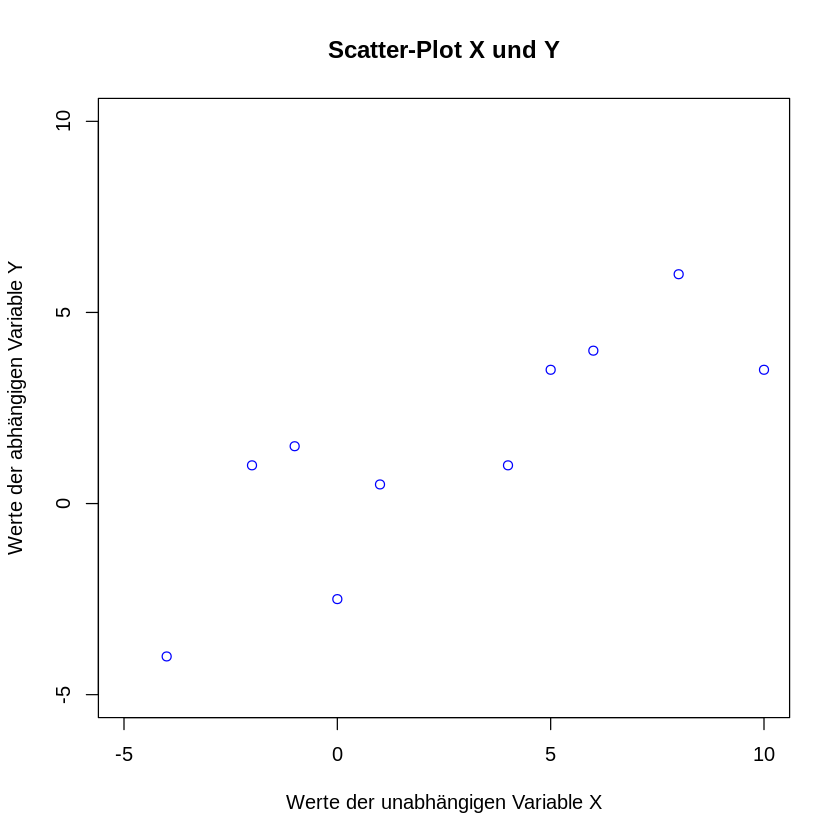

In [1]:
X =matrix(data=c(4,6, 1, -4,-2,10 ,-1, 0, 8, 5), nrow=10, ncol=1)
Y =matrix(data=c(1,4,0.5,-4,1 ,3.5,1.5,-2.5, 6, 3.5), nrow=10, ncol=1)

#
D = cbind(X,Y)
print(D)
#
plot(X,Y,
    xlim = c(-5, 10),
    ylim = c(-5, 10),
    col = "blue",
    main = "Scatter-Plot X und Y",
    xlab = "Werte der unabhängigen Variable X",
    ylab = "Werte der abhängigen Variable Y")

## <font color='blue'> Aufgabe 1)

<font color='blue'> 
    
Zunächst möchten wir selbst einen Bootstrap berechnen. Dazu wollen wir wieder Schritt für Schritt eine Funktion dafür bauen.

Funktionen sind essenziell in der Programmierung, da wir so genau nachvollziehen können, welche Prozesse ablaufen und genau bestimmen können, was wir berechnen und ausgeben lassen wollen.

<font color='blue'>     
a) Schreibe eine Funktion, der zwei Werte übergeben werden können: zum einen ein Datensatz und zum anderen ein Indexvektor.
    
    
b) Innerhalb der Funktion soll nun auf den Datensatz mit dem im äußeren Teil der Funktion bestimmten Indexvektor zugegriffen werden.

    
c) Gebe dann die ganzen Datensatz aus
    
    
Nun wollen wir die Funktion testen. 

d) Übergebt der Funktion als Datensatz den oben definierten Datensatz $D$.

e) Wichtig um nun einen Bootstrap zu kreieren ist nun, was ihr dem Bootstrap als Indizes übergebt. Was passiert, wenn man als Index einen Wert eingibt? In welchem Bereich muss der Indexwert sein?

f) Nutzt nun den Befehl $sample$ um die Indizes für einen Bootstrap zu bestimmen. Informiert euch über die Werte, die man dem Befehl $sample$ übergeben kann. Dazu ist $?sample$ hilfreich. Wie müssen die Parameter ausgestaltet sein? Was bedeutet "Ziehen mit Zurücklegen"?

Weitere Hilfe und Information kann im Buch unter "5.3.4 The Bootstrap" ab S. 194 gefunden werden. 

In [ ]:
#a)

In [ ]:
#b)

In [ ]:
#c)

In [ ]:
#d)

In [ ]:
#e)

In [ ]:
#f) 

## <font color='blue'> Aufgabe 2)

<font color='blue'> 
Jetzt wollen wir die Funktion erweitern und eine Regression mit dem Bootstrap fitten und dann den Durchschnitt der Steigung, sowie des Intercepts berechnen.
    
    
a) Bitte erweitert eure vorher geschriebene Funktion um einen Teil, in dem ihr eine Regression auf dem Datensatz erstellt, den ihr durch den Bootstrap erstellt habt. 
    
b) Lasst euch in der Funktion auch den Intercept, sowie die berechnete Steigung der Regressionsgeraden ausrechnen und angeben. Tipps: Um einen Wert aus einer Funktion ausgeben zu lassen, kann man den $return$ Befehl verwenden. Um mehrere Werte ausgeben zu lassen, könnt ihr z.B. soetwas nutzen: $return(list("Intercept" = Intercept, "Steigung" = Steigung))$.
    
    
c) Probiert die Funktion nun mit Hilfe des Datensatzes $D$ aus.
    
    
d) Nun möchten wir dieses Funktion öfter durchlaufen lassen (ich lasse sie 50 Mal durchlaufen) und die jeweils errechneten Werte für Intercept und Steigung in einer Liste abspeichern. Gegebenenfalls, müsst ihr dazu nochmal eure Funktion etwas verändern. Um eine Funktion mehrfach auszuführen, eignet sich u.a. der Befehl $sapply$. Nutzt gerne Foren oder den Befehl $?sapply$, um mehr über die Eigenschaften herauszufinden. Eine for-Schleife wäre ebenfalls möglich.


    
e) Im letzten Schritt möchten wir nun noch die Mittelwerte der berechneten Intercepts und Steigungen ermitteln.


In [ ]:
#a)

In [ ]:
#b)

In [ ]:
#c)

In [ ]:
#d)

In [ ]:
#e)

## <font color='blue'> Aufgabe 3)

<font color='blue'> 
Seht euch bitte zusätzlich den Befehl $boot()$ und seine Parameter an. Dazu könnt ihr auch im Buch nachlesen.

In [4]:
install.packages("boot")
library("boot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
?boot

### <font color='darkorange'> Zugehörige Seiten in der Pflichtlektüre: </font> 
Ab "5.3.4 The Bootstrap", S.194